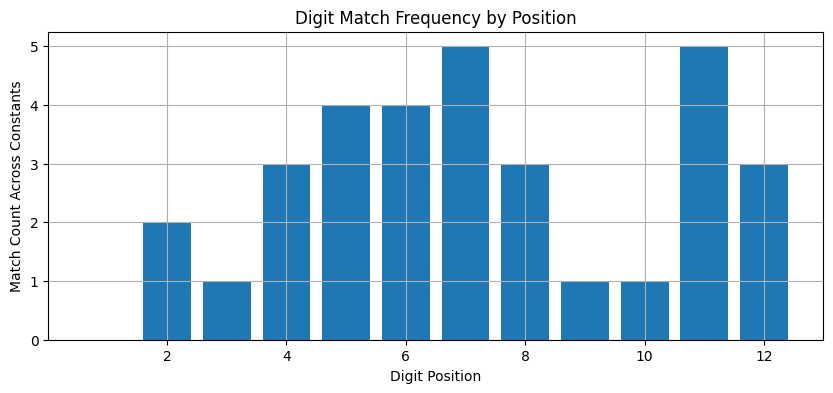

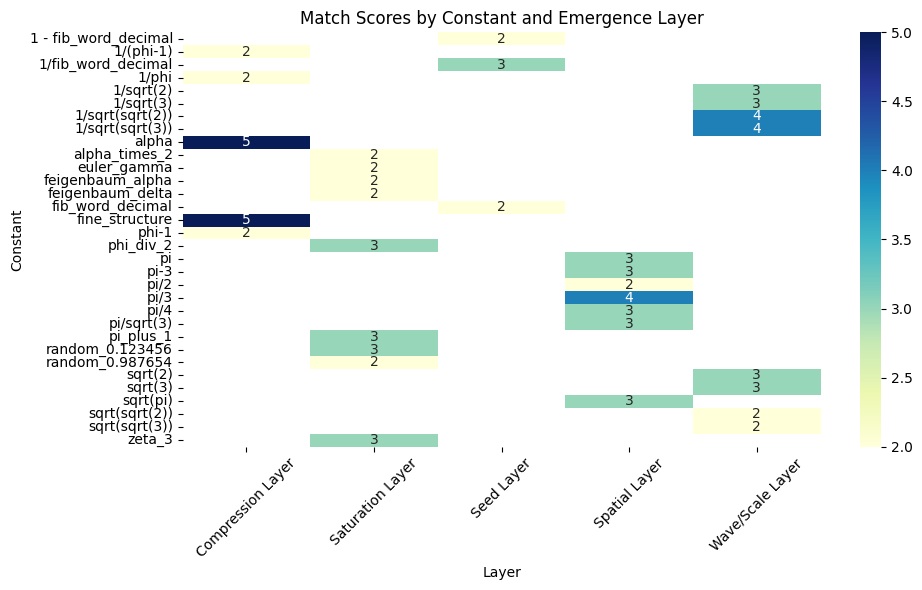

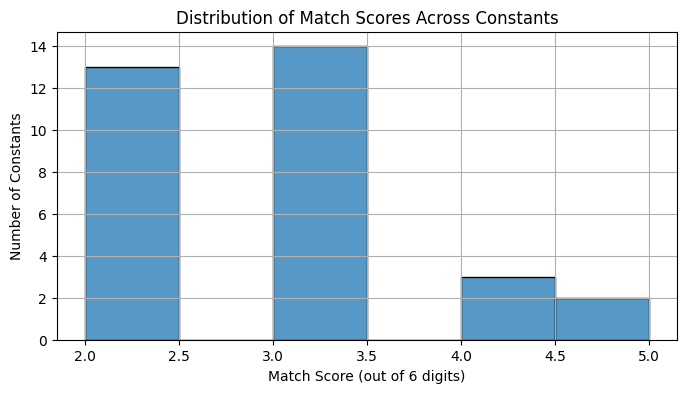

      fine_structure: ✗✗✗✗✗✗✔✗✗✗✗✗
               alpha: ✗✗✗✗✗✗✔✗✗✗✗✔
     1/sqrt(sqrt(3)): ✗✗✔✗✗✔✗✗✗✗✗✗
     1/sqrt(sqrt(2)): ✗✗✗✗✗✗✗✗✗✗✗✗
                pi/3: ✗✗✗✗✗✗✔✔✗✗✔✗


,Layer,Constant,MatchScore,DigitResidueMap
3,Compression Layer,fine_structure,5,✗✗✗✗✗✗✔✗✗✗✗✗
4,Compression Layer,alpha,5,✗✗✗✗✗✗✔✗✗✗✗✔
15,Wave/Scale Layer,1/sqrt(sqrt(3)),4,✗✗✔✗✗✔✗✗✗✗✗✗
11,Wave/Scale Layer,1/sqrt(sqrt(2)),4,✗✗✗✗✗✗✗✗✗✗✗✗
18,Spatial Layer,pi/3,4,✗✗✗✗✗✗✔✔✗✗✔✗
8,Wave/Scale Layer,sqrt(2),3,✗✗✗✗✗✗✗✔✗✗✗✔
2,Seed Layer,1/fib_word_decimal,3,✗✗✗✗✗✗✗✗✗✗✗✗
10,Wave/Scale Layer,1/sqrt(2),3,✗✗✗✗✗✗✗✗✗✗✔✗
12,Wave/Scale Layer,sqrt(3),3,✗✗✗✗✗✗✗✗✗✗✗✗
26,Saturation Layer,zeta_3,3,✗✔✗✗✗✗✗✗✗✗✗✗


In [2]:
# 📦 GRA Final Validation Colab Suite: Testing Emergence Hierarchy and Digit Residue Across Constants
# 👨‍🏫 Goal: Address skepticism with precision, logic, and numerical transparency

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sympy import primerange
from IPython.display import display

# === CORE CONSTANTS ===
phi_f = (1 + math.sqrt(5)) / 2
alpha_inv = 137.035999
alpha = 1 / alpha_inv
fine_structure_decimal = 0.0072973525693
delta = math.pi - 3.141412303134

# Fibonacci word decimal
def fibonacci_word(n):
    a, b = "0", "01"
    for _ in range(n):
        a, b = b, b + a
    return b[:2**n]

fib_word_str = fibonacci_word(12)
fib_word_decimal = sum([int(b)*(0.5**(i+1)) for i,b in enumerate(fib_word_str)])
fib_word_decimal = fib_word_decimal if fib_word_decimal != 0 else 1e-10

# === Constants Grouped by Emergence Layer ===
layers = {
    "Seed Layer": {
        "fib_word_decimal": fib_word_decimal,
        "1 - fib_word_decimal": 1 - fib_word_decimal,
        "1/fib_word_decimal": 1 / fib_word_decimal
    },
    "Compression Layer": {
        "fine_structure": fine_structure_decimal,
        "alpha": alpha,
        "phi-1": phi_f - 1,
        "1/phi": 1 / phi_f,
        "1/(phi-1)": 1 / (phi_f - 1),
    },
    "Wave/Scale Layer": {
        "sqrt(2)": math.sqrt(2),
        "sqrt(sqrt(2))": math.sqrt(math.sqrt(2)),
        "1/sqrt(2)": 1 / math.sqrt(2),
        "1/sqrt(sqrt(2))": 1 / math.sqrt(math.sqrt(2)),
        "sqrt(3)": math.sqrt(3),
        "sqrt(sqrt(3))": math.sqrt(math.sqrt(3)),
        "1/sqrt(3)": 1 / math.sqrt(3),
        "1/sqrt(sqrt(3))": 1 / math.sqrt(math.sqrt(3)),
    },
    "Spatial Layer": {
        "pi": math.pi,
        "pi/2": math.pi / 2,
        "pi/3": math.pi / 3,
        "pi/4": math.pi / 4,
        "pi-3": math.pi - 3,
        "sqrt(pi)": math.sqrt(math.pi),
        "pi/sqrt(3)": math.pi / math.sqrt(3)
    },
    "Saturation Layer": {
        "feigenbaum_delta": 4.669201609,
        "feigenbaum_alpha": 2.502907875,
        "euler_gamma": 0.5772156649,
        "zeta_3": 1.2020569031,
        "random_0.123456": 0.123456,
        "random_0.987654": 0.987654,
        "alpha_times_2": alpha * 2,
        "pi_plus_1": math.pi + 1,
        "phi_div_2": phi_f / 2
    }
}

# Flatten constants
flattened_constants = {}
for group, consts in layers.items():
    for k, v in consts.items():
        flattened_constants[k] = v

# === Golden-Damped Zeta Generator (safe) ===
def golden_zeta(N=50, base_seed=phi_f, log_term_cutoff=-700):
    primes = list(primerange(1, 1000))[:N]
    terms = []
    for i, p in enumerate(primes):
        try:
            exponent = base_seed ** (i + 1)
            log_term = -exponent * math.log(p)
            terms.append(math.exp(log_term) if log_term > log_term_cutoff else 0)
        except:
            terms.append(0)
    return sum(terms), alpha_inv * sum(terms)

# === Utilities ===
def digit_match_score(a, b, window=6):
    a_str = f"{a:.16f}".replace('.', '')
    b_str = f"{b:.16f}".replace('.', '')
    max_score = 0
    for i in range(len(a_str)-window):
        a_sub = a_str[i:i+window]
        for j in range(len(b_str)-window):
            b_sub = b_str[j:j+window]
            score = sum(x==y for x, y in zip(a_sub, b_sub))
            max_score = max(max_score, score)
    return max_score

def digit_residue_map(a, b, digits=12):
    a_str = f"{a:.16f}".replace('.', '')[:digits]
    b_str = f"{b:.16f}".replace('.', '')[:digits]
    return ''.join(['✔' if x==y else '✗' for x, y in zip(a_str, b_str)])

def digit_match_by_position(a, b, digits=12):
    a_str = f"{a:.16f}".replace('.', '')[:digits]
    b_str = f"{b:.16f}".replace('.', '')[:digits]
    return [int(x==y) for x, y in zip(a_str, b_str)]

# === Evaluation Framework ===
def residue_evaluation(N=50):
    zeta_val, scaled_zeta = golden_zeta(N)
    records = []
    for layer, consts in layers.items():
        for name, value in consts.items():
            match_score = digit_match_score(scaled_zeta, value)
            residue = digit_residue_map(scaled_zeta, value)
            match_vector = digit_match_by_position(scaled_zeta, value)
            records.append((layer, name, value, match_score, residue, match_vector))
    df = pd.DataFrame(records, columns=["Layer", "Constant", "Value", "MatchScore", "DigitResidueMap", "MatchVector"])
    return df.sort_values(["MatchScore"], ascending=False)

# === Visual 1: Digit Position Match Histogram ===
def digit_position_histogram(df):
    all_vectors = np.array([r for r in df["MatchVector"]])
    summed = np.sum(all_vectors, axis=0)
    plt.figure(figsize=(10, 4))
    plt.bar(range(1, len(summed)+1), summed)
    plt.xlabel("Digit Position")
    plt.ylabel("Match Count Across Constants")
    plt.title("Digit Match Frequency by Position")
    plt.grid(True)
    plt.show()

# === Visual 2: Heatmap of Match Scores by Layer ===
def match_score_heatmap(df):
    pivot = df.pivot_table(values="MatchScore", index="Constant", columns="Layer", aggfunc='mean')
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, annot=True, cmap="YlGnBu", cbar=True)
    plt.title("Match Scores by Constant and Emergence Layer")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# === Visual 3: Histogram of Match Scores Overall ===
def match_score_histogram(df):
    plt.figure(figsize=(8, 4))
    sns.histplot(df["MatchScore"], bins=6, kde=False)
    plt.title("Distribution of Match Scores Across Constants")
    plt.xlabel("Match Score (out of 6 digits)")
    plt.ylabel("Number of Constants")
    plt.grid(True)
    plt.show()

# === Visual 4: Residue Alignment Highlight (Top 5 Constants) ===
def top_residue_map(df, top_n=5):
    top = df.head(top_n)
    for _, row in top.iterrows():
        print(f"{row['Constant']:>20}: {row['DigitResidueMap']}")

# === Run Everything ===
df_result = residue_evaluation(N=50)
digit_position_histogram(df_result)
match_score_heatmap(df_result)
match_score_histogram(df_result)
top_residue_map(df_result)
display(df_result[["Layer", "Constant", "MatchScore", "DigitResidueMap"]].style.set_properties(**{'font-family': 'monospace'}).background_gradient(subset=["MatchScore"], cmap='YlGnBu'))